### **Name: Manuj Kumar Joshi**


### **Status : Intern**

### **Organisation : The Sparks Foundation**



### **Task 4 : Exploratory Data Analysis**



<div class="alert alert-block alert-info" style="margin-top: 20px">
     Question : As a security/defense analyst, try to find out the hot zone of terrorism.
</div>

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [33]:
df=pd.read_csv('globalterrorismdb_0718dist.csv',encoding='latin1')
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [34]:
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [35]:
df.shape  #181691 rows and 135 columns.....its huge let's choose useful data

(181691, 135)

In [37]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day',           #rename columns for more clarity
                   'country_txt':'Country','region_txt':'Region',
                   'provstate':'State','city':'City','attacktype1_txt':'AttackType',
                   'targtype1_txt':'TargetType','weaptype1_txt':'WeaponType',
                   'nkill':'Killed','nwound':'Wounded','gname':'Group','motive':'Motive'
                  },inplace=True)
df.columns.values

array(['eventid', 'Year', 'Month', 'Day', 'approxdate', 'extended',
       'resolution', 'country', 'Country', 'region', 'Region', 'State',
       'City', 'latitude', 'longitude', 'specificity', 'vicinity',
       'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr',
       'alternative', 'alternative_txt', 'multiple', 'success', 'suicide',
       'attacktype1', 'AttackType', 'attacktype2', 'attacktype2_txt',
       'attacktype3', 'attacktype3_txt', 'targtype1', 'TargetType',
       'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1',
       'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2',
       'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt',
       'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt',
       'corp3', 'target3', 'natlty3', 'natlty3_txt', 'Group', 'gsubname',
       'gname2', 'gsubname2', 'gname3', 'gsubname3', 'Motive',
       'guncertain1', 'guncertain2', 'guncertain3', 'individual',
       'nperps', 'n

In [38]:
df=df[['Year','Month','Day','Country','State','Region','City','AttackType','TargetType','WeaponType','Killed','Wounded','Group','Motive']]
df.sample(5)

,Year,Month,Day,Country,State,Region,City,AttackType,TargetType,WeaponType,Killed,Wounded,Group,Motive
157220,2016,1,1,Burundi,Bujumbura Mairie,Sub-Saharan Africa,Bujumbura,Armed Assault,Police,Explosives,1.0,0.0,Unknown,NaN
171507,2016,12,30,Sudan,Central Darfur,Sub-Saharan Africa,Nertiti,Armed Assault,Private Citizens & Property,Firearms,0.0,0.0,Sudan Liberation Movement,NaN
35423,1988,8,19,Colombia,Antioquia,South America,Medellin,Assassination,Government (General),Firearms,1.0,0.0,Death Squad,NaN
20660,1984,1,8,Lebanon,South,Middle East & North Africa,Tyre,Bombing/Explosion,Military,Explosives,0.0,0.0,Palestine Liberation Organization (PLO),NaN
151967,2015,8,17,India,Jharkhand,South Asia,Harindega,Bombing/Explosion,Unknown,Explosives,0.0,0.0,Unknown,NaN


In [39]:
df.isnull().sum()

Year               0
Month              0
Day                0
Country            0
State            421
Region             0
City             434
AttackType         0
TargetType         0
WeaponType         0
Killed         10313
Wounded        16311
Group              0
Motive        131130
dtype: int64

In [8]:
df['Wounded']=df['Wounded'].fillna(0)    
df['Killed']=df['Killed'].fillna(0)

In [40]:
df.isnull().sum()

Year               0
Month              0
Day                0
Country            0
State            421
Region             0
City             434
AttackType         0
TargetType         0
WeaponType         0
Killed         10313
Wounded        16311
Group              0
Motive        131130
dtype: int64

In [41]:
df.head()

,Year,Month,Day,Country,State,Region,City,AttackType,TargetType,WeaponType,Killed,Wounded,Group,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,Assassination,Private Citizens & Property,Unknown,1.0,0.0,MANO-D,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),Unknown,0.0,0.0,23rd of September Communist League,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,Assassination,Journalists & Media,Unknown,1.0,0.0,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,Bombing/Explosion,Government (Diplomatic),Explosives,NaN,NaN,Unknown,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Incendiary,NaN,NaN,Unknown,NaN


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Year        181691 non-null  int64  
 1   Month       181691 non-null  int64  
 2   Day         181691 non-null  int64  
 3   Country     181691 non-null  object 
 4   State       181270 non-null  object 
 5   Region      181691 non-null  object 
 6   City        181257 non-null  object 
 7   AttackType  181691 non-null  object 
 8   TargetType  181691 non-null  object 
 9   WeaponType  181691 non-null  object 
 10  Killed      171378 non-null  float64
 11  Wounded     165380 non-null  float64
 12  Group       181691 non-null  object 
 13  Motive      50561 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 19.4+ MB


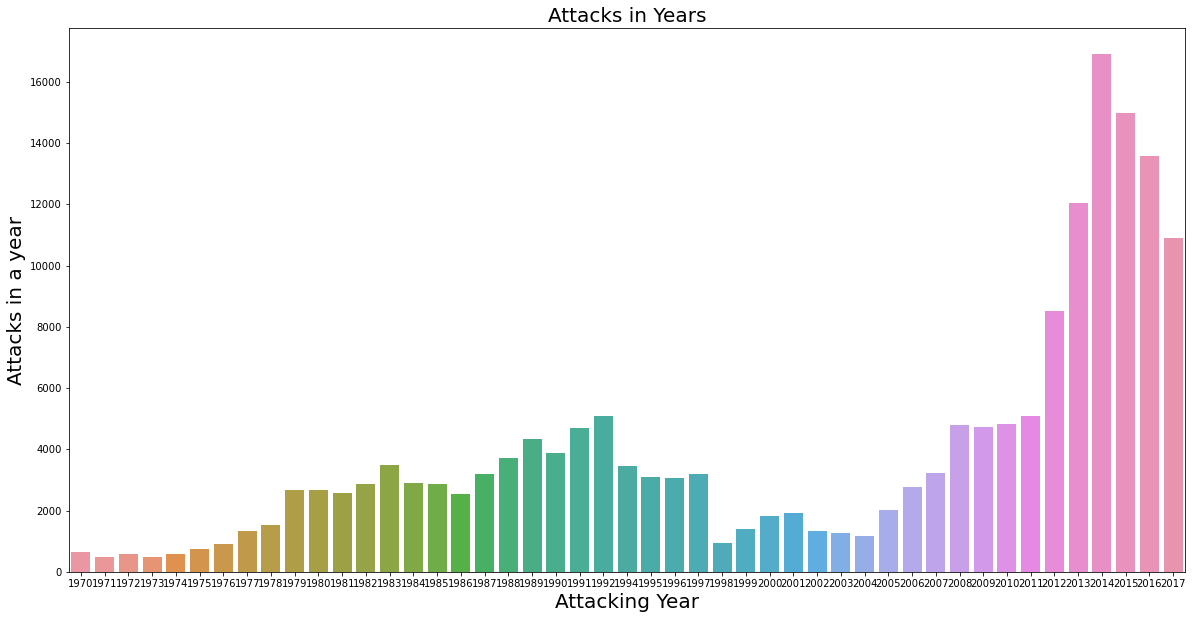

In [12]:
attacks_count=df['Year'].value_counts().sort_index()
year=df['Year'].unique()
plt.figure(figsize=(20,10))
sns.barplot(x=year,y=attacks_count)
plt.title('Attacks in Years',fontsize=20)
plt.xlabel('Attacking Year',fontsize=20)
plt.ylabel('Attacks in a year',fontsize=20)
plt.show()

In [43]:
df['Year']=df['Year'].astype('object')
df['Month']=df['Month'].astype('object')
df['Day']=df['Day'].astype('object')

In [44]:
region=df.groupby(['Region']).sum()
region['Casualties']=region['Killed']+region['Wounded']
freq_by_region=pd.crosstab(df['Year'],df['Region'])  #find the frequency of region
uni=freq_by_region.sum()
region['Attacks_occoured_in_total']=uni
region

,Killed,Wounded,Casualties,Attacks_occoured_in_total
Region,,,,
Australasia & Oceania,150.0,260.0,410.0,282
Central America & Caribbean,28708.0,8991.0,37699.0,10344
Central Asia,1000.0,2009.0,3009.0,563
East Asia,1152.0,9213.0,10365.0,802
Eastern Europe,7415.0,12045.0,19460.0,5144
Middle East & North Africa,137642.0,214308.0,351950.0,50474
North America,4916.0,21531.0,26447.0,3456
South America,28849.0,16704.0,45553.0,18978
South Asia,101319.0,141360.0,242679.0,44974


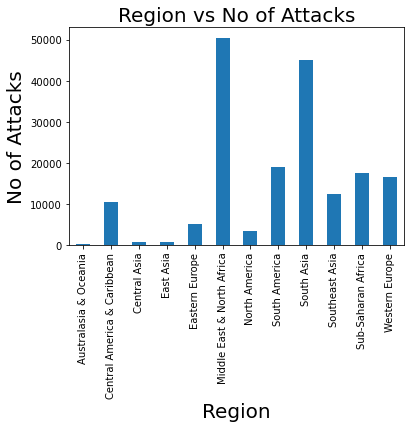

In [15]:
region['Attacks_occoured_in_total'].plot(kind='bar')
plt.title('Region vs No of Attacks',fontsize=20)
plt.xlabel('Region',fontsize=20)
plt.ylabel('No of Attacks',fontsize=20)
plt.show()

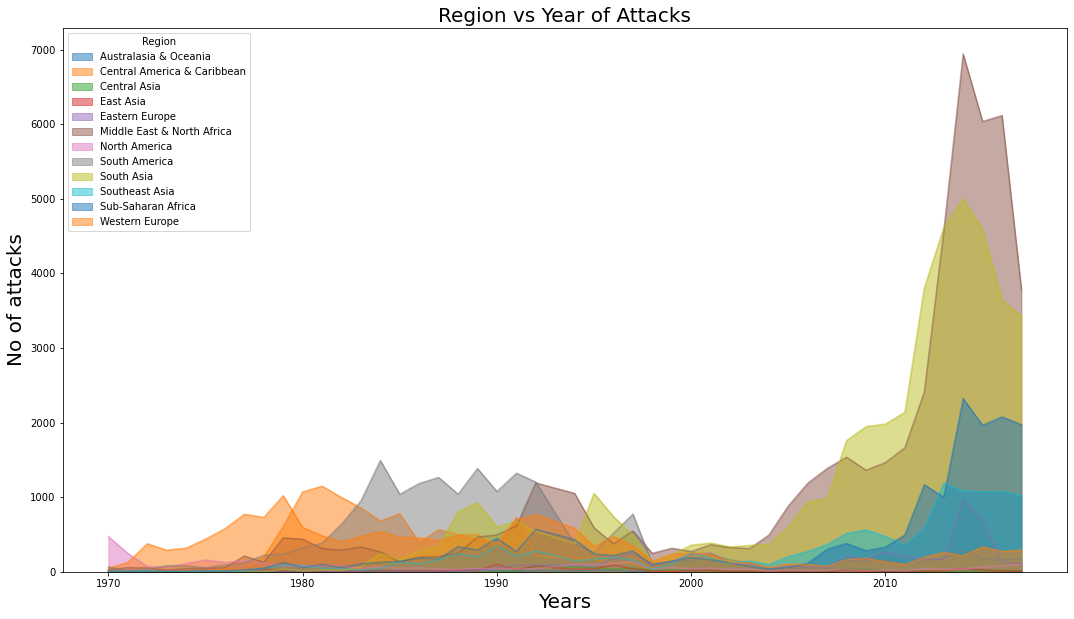

In [16]:
freq_by_region.plot(kind='area',stacked=False,alpha=.5,figsize=(18,10))
plt.title('Region vs Year of Attacks',fontsize=20)
plt.xlabel('Years',fontsize=20)
plt.ylabel('No of attacks',fontsize=20)
plt.show()

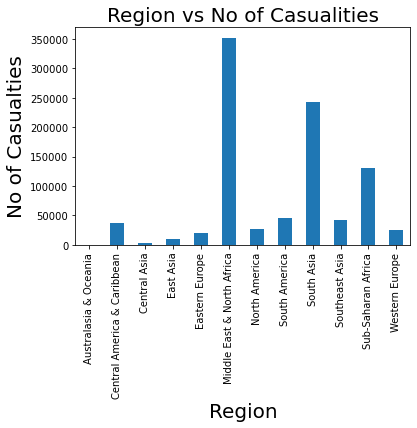

In [17]:
region['Casualties'].plot(kind='bar')
plt.title('Region vs No of Casualities',fontsize=20)
plt.xlabel('Region',fontsize=20)
plt.ylabel('No of Casualties',fontsize=20)
plt.show()

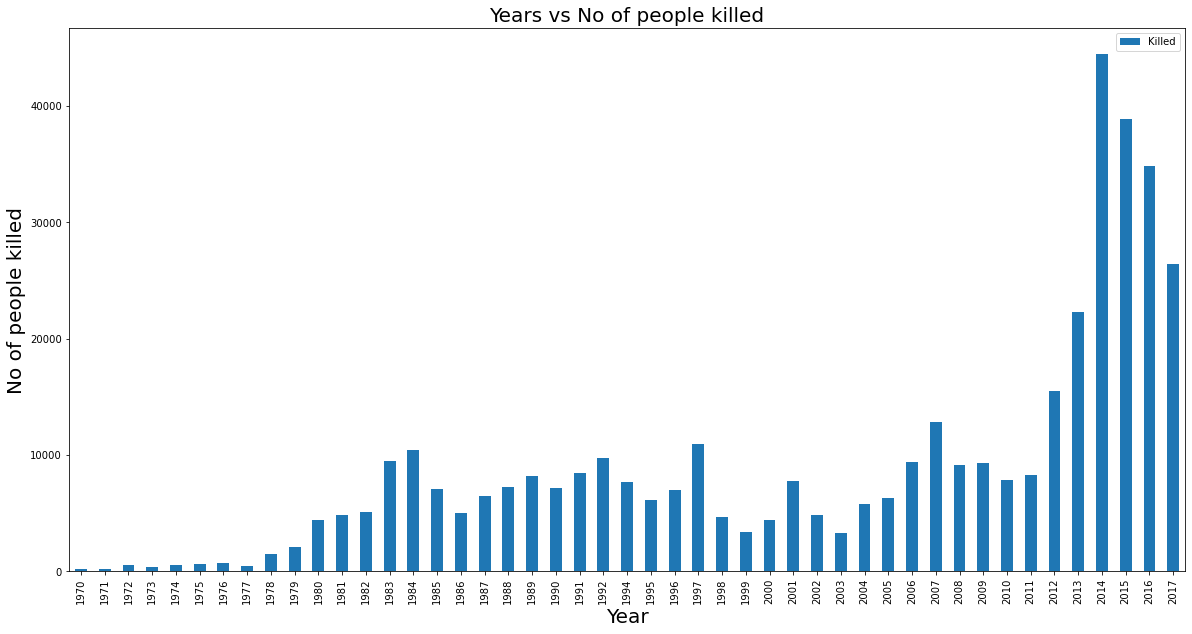

In [18]:
kill=df[['Year','Killed']].groupby('Year').sum()
fig,ax4 = plt.subplots(figsize=(20,10))
plt.title('Years vs No of people killed',fontsize=20)
plt.xlabel('Years',fontsize=20)
plt.ylabel('No of people killed',fontsize=20)
kill.plot(kind='bar',ax=ax4)

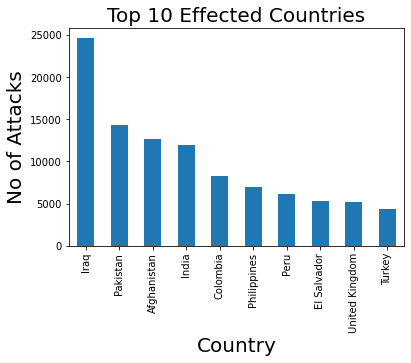

In [19]:
attack_country_wise=df['Country'].value_counts()
top_ten_country=attack_country_wise[0:10]  #top ten countries where attacks occoured
top_ten_country.plot(kind='bar')
plt.title('Top 10 Effected Countries',fontsize=20)
plt.xlabel('Country',fontsize=20)
plt.ylabel('No of Attacks',fontsize=20)
plt.show()

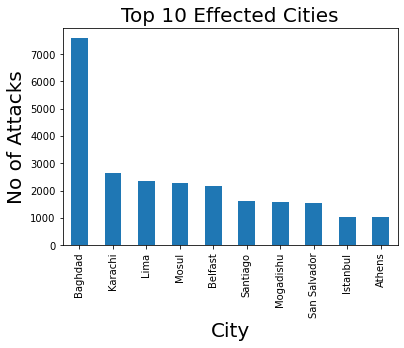

In [20]:
attack_city_wise=df['City'].value_counts().drop('Unknown')
top_ten_city=attack_city_wise[0:10]  #top ten Cities where attacks occoured
top_ten_city.plot(kind='bar')
plt.title('Top 10 Effected Cities',fontsize=20)
plt.xlabel('City',fontsize=20)
plt.ylabel('No of Attacks',fontsize=20)
plt.show()

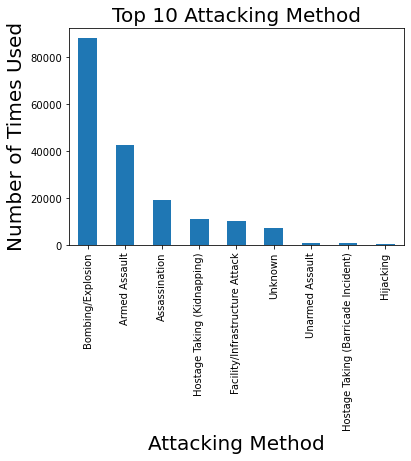

In [21]:
attack_wise=df['AttackType'].value_counts()
top_ten_attackType=attack_wise[0:10]  #top ten Cities where attacks occoured
top_ten_attackType.plot(kind='bar')
plt.title('Top 10 Attacking Method',fontsize=20)
plt.xlabel('Attacking Method',fontsize=20)
plt.ylabel('Number of Times Used',fontsize=20)
plt.show()

Text(0, 0.5, 'No of People killed')

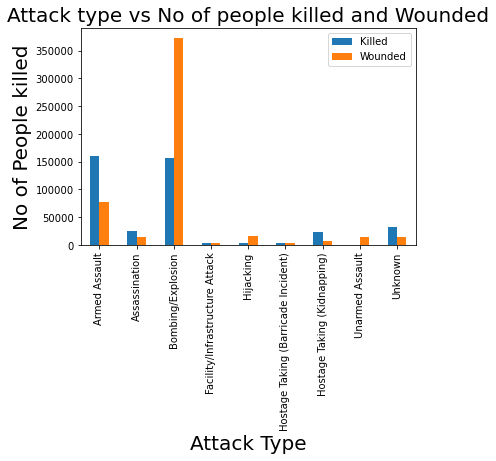

In [22]:
attack_type_killed=df[['Killed','Wounded']].groupby(df['AttackType']).sum()
attack_type_killed.plot(kind='bar')
plt.title('Attack type vs No of people killed and Wounded',fontsize=20)
plt.xlabel('Attack Type',fontsize=20)
plt.ylabel('No of People killed',fontsize=20)

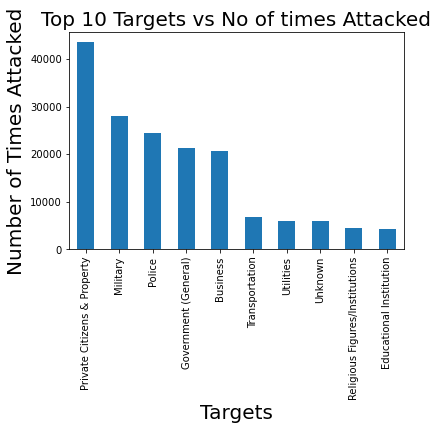

In [23]:
target_wise=df['TargetType'].value_counts()
top_ten_targetType=target_wise[0:10]  
top_ten_targetType.plot(kind='bar')
plt.title('Top 10 Targets vs No of times Attacked',fontsize=20)
plt.xlabel('Targets',fontsize=20)
plt.ylabel('Number of Times Attacked',fontsize=20)
plt.show()

Text(0, 0.5, 'No of People killed')

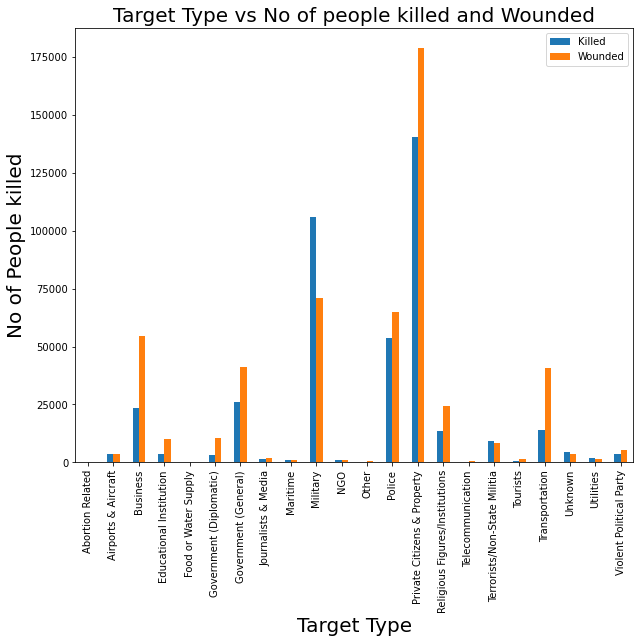

In [24]:
target_wise_killed=df[['Killed','Wounded']].groupby(df['TargetType']).sum()
target_wise_killed.plot(kind='bar',figsize=(10,8))
plt.title('Target Type vs No of people killed and Wounded',fontsize=20)
plt.xlabel('Target Type',fontsize=20)
plt.ylabel('No of People killed',fontsize=20)

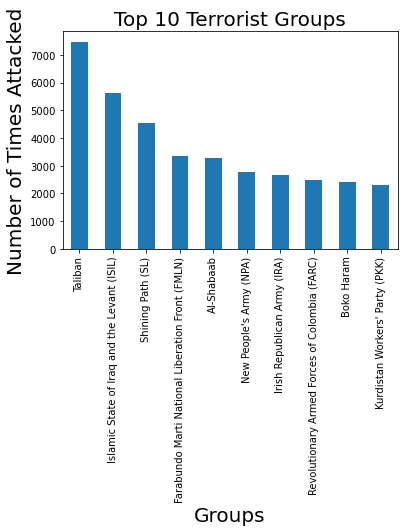

In [25]:
group_wise=df['Group'].value_counts().drop('Unknown')
top_ten_Group=group_wise[0:10]  #top ten Cities where attacks occoured
top_ten_Group.plot(kind='bar')
plt.title('Top 10 Terrorist Groups',fontsize=20)
plt.xlabel('Groups',fontsize=20)
plt.ylabel('Number of Times Attacked',fontsize=20)
plt.show()

Text(0, 0.5, 'No of people killed and wounded')

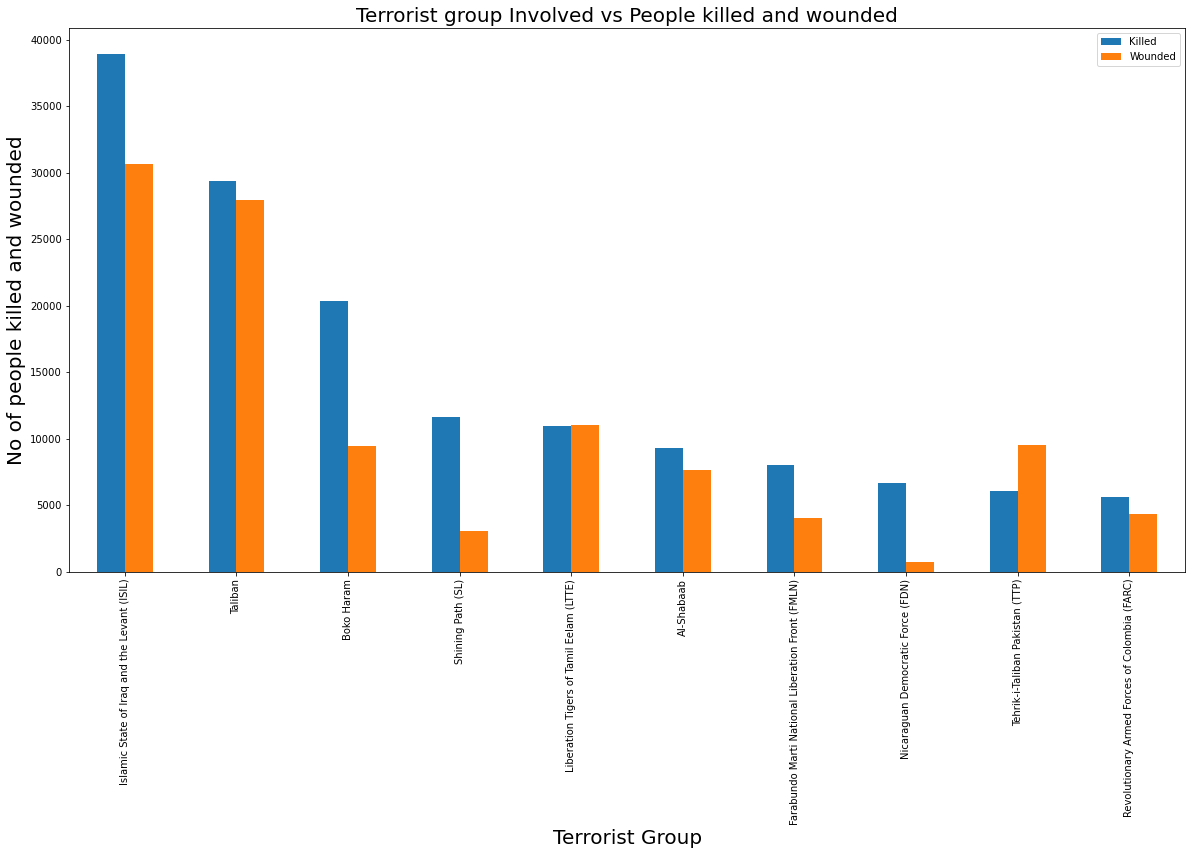

In [26]:
Top_ten_killedWound=df[['Group','Killed','Wounded']].groupby([df['Group']]).sum().sort_values('Killed',ascending=False).drop('Unknown').head(10)
Top_ten_killedWound.plot(kind='bar',figsize=(20,10))
plt.title('Terrorist group Involved vs People killed and wounded',fontsize=20)
plt.xlabel('Terrorist Group',fontsize=20)
plt.ylabel('No of people killed and wounded',fontsize=20)


In [27]:
Top_ten_countries=df[['Group','Country','Killed']].groupby(['Group','Country']).sum().sort_values('Killed',ascending=False).drop('Unknown')
Top_ten_countries.head(10)    #Top 10 countries where people are killed and Organisation involved

,,Killed
Group,Country,
Islamic State of Iraq and the Levant (ISIL),Iraq,31058.0
Taliban,Afghanistan,29269.0
Boko Haram,Nigeria,16917.0
Shining Path (SL),Peru,11595.0
Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10928.0
Al-Shabaab,Somalia,8176.0
Farabundo Marti National Liberation Front (FMLN),El Salvador,8019.0
Islamic State of Iraq and the Levant (ISIL),Syria,6883.0
Nicaraguan Democratic Force (FDN),Nicaragua,6630.0


In [28]:
df[['AttackType','Killed']].groupby(df['AttackType']).sum().sort_values('Killed',ascending=False).drop('Unknown')

,Killed
AttackType,
Armed Assault,160297.0
Bombing/Explosion,157321.0
Assassination,24920.0
Hostage Taking (Kidnapping),24231.0
Hostage Taking (Barricade Incident),4478.0
Hijacking,3718.0
Facility/Infrastructure Attack,3642.0
Unarmed Assault,880.0


In [29]:
df[['Country','Killed']].groupby(df['Country']).sum().sort_values('Killed',ascending=False).head(10)

,Killed
Country,
Iraq,78589.0
Afghanistan,39384.0
Pakistan,23822.0
Nigeria,22682.0
India,19341.0
Sri Lanka,15530.0
Syria,15229.0
Colombia,14698.0
Peru,12771.0


In [30]:
attacks_month=df['Month'].value_counts().sort_index().nlargest().sort_values(ascending=False)
attacks_month     # May is the most infamous month

5     16875
7     16268
8     15800
10    15563
6     15359
Name: Month, dtype: int64

In [31]:
attacks_month=df['Day'].value_counts().sort_index().nlargest().sort_values(ascending=False)
attacks_month     # 15th is most infamous Day in a month

15    6500
1     6344
4     6153
16    6112
10    6064
Name: Day, dtype: int64

<h3>Findings</h3>

<h3>*2014 is the year of most Attacks
*Middle East and North Africa is the most Disturbed region 
*Middle East and North Africa is the region where most casualties happened
*2014 is the year of most killings
*Iraq is the most effected conntry and Bagdad is the most effected City
*Bombing is the most famous method of attacking
*Private citizens and property are most favourite targets
*Taliban is the most the Involved Terrorist Group but ISIL killed most people and in the country named Iraq
*Armed Assault method killed most people
*Maximum people are killed in Iraq
*May is the most infamous month
*15th is the most infamous Day
    </h3>